1. Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset

Reference
https://inside-machinelearning.com/en/how-to-do-linear-regression-with-keras/

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data=pd.read_csv("boston_housing1.csv")
data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:

data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<Axes: >

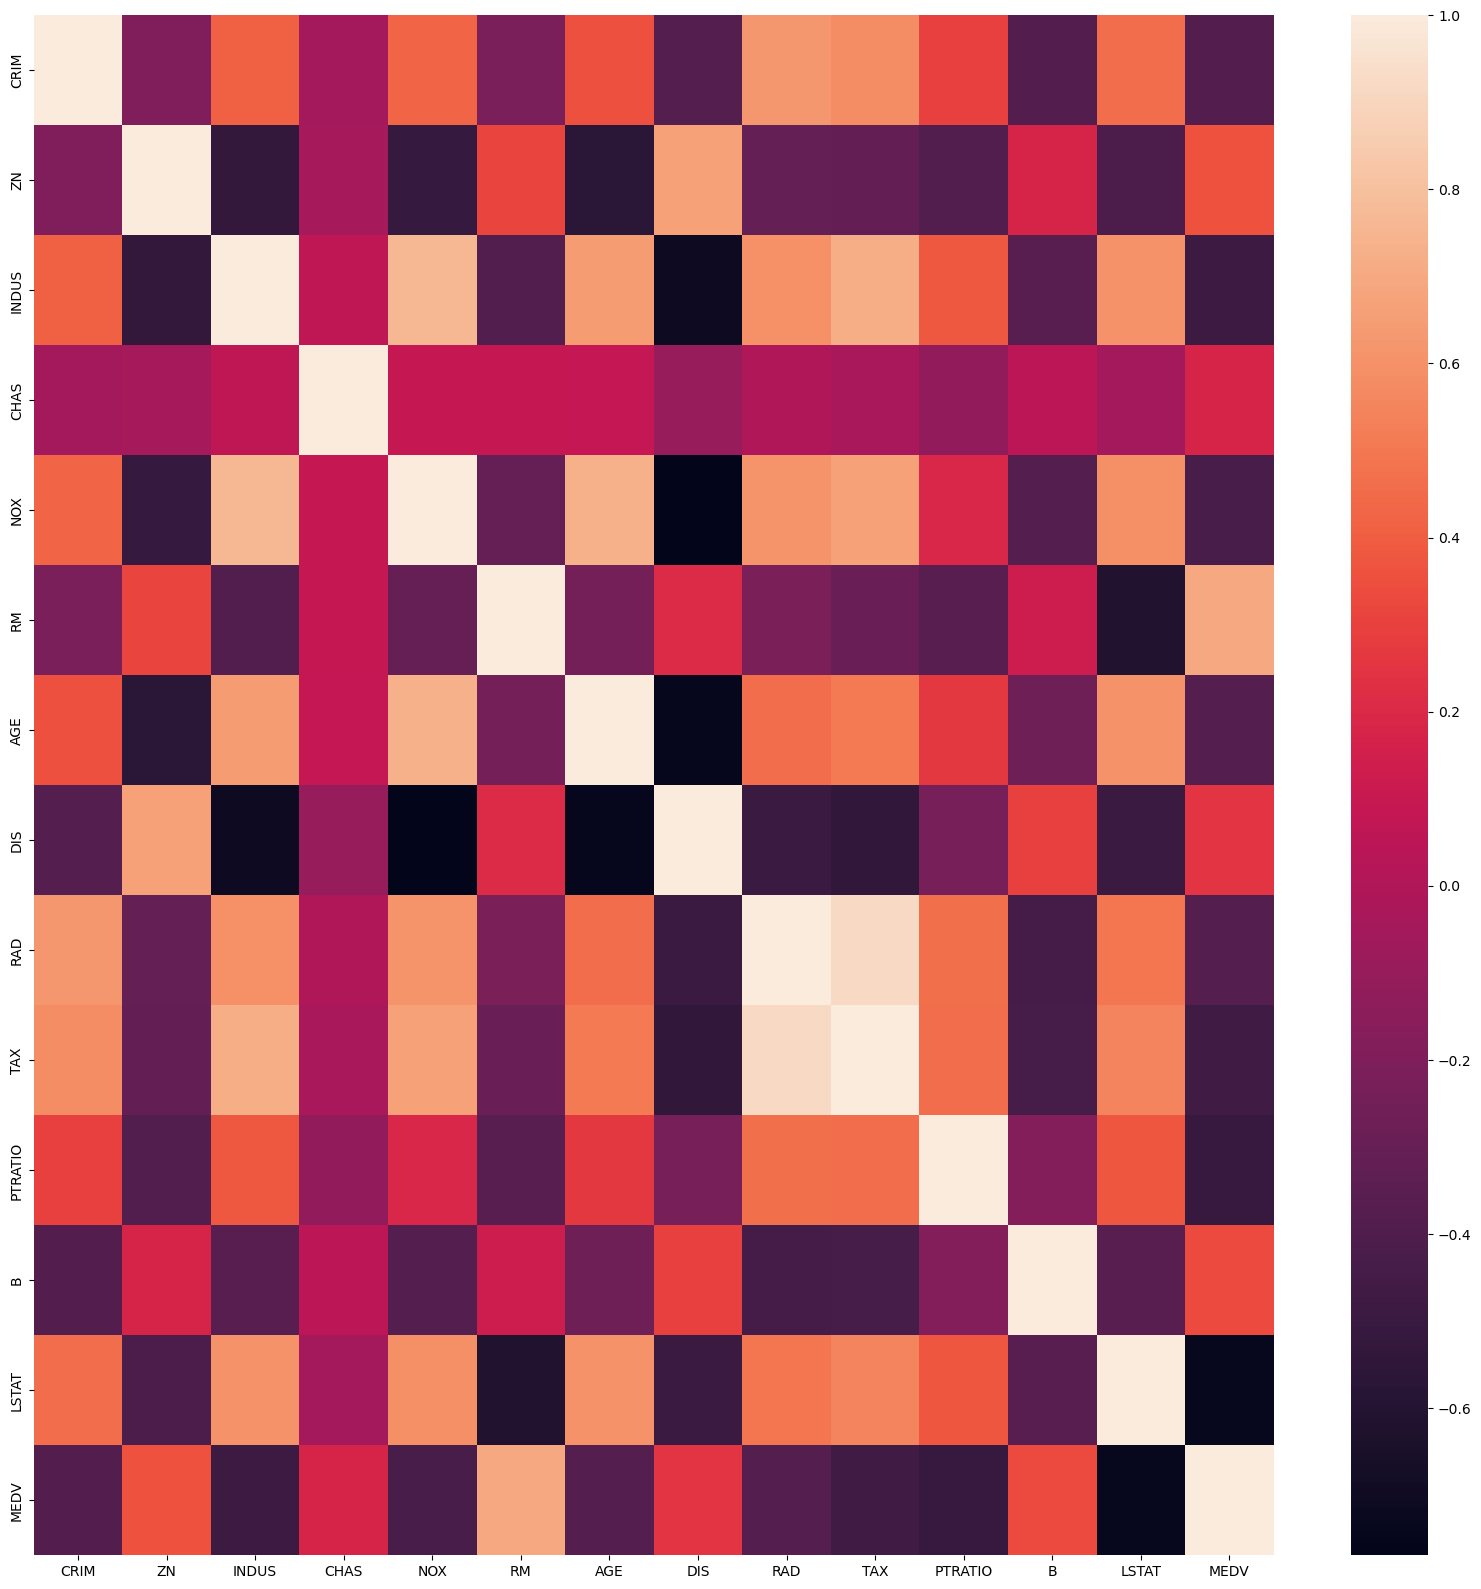

In [7]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr)

In [9]:
X =data.drop(['MEDV'], axis = 1)# data['area']#
y = data['MEDV']

In [10]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [12]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [13]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [14]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = Sequential()
model.add(Dense(64, input_dim =13, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [18]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200


9/9 [==============================] - 4s 83ms/step - loss: 547.4005 - mse: 547.4005 - mae: 21.7456 - val_loss: 563.0331 - val_mse: 563.0331 - val_mae: 21.9742
Epoch 2/200
9/9 [==============================] - 0s 17ms/step - loss: 520.1551 - mse: 520.1551 - mae: 21.0773 - val_loss: 523.0411 - val_mse: 523.0411 - val_mae: 21.0145
Epoch 3/200
9/9 [==============================] - 0s 18ms/step - loss: 466.3133 - mse: 466.3133 - mae: 19.6417 - val_loss: 438.4214 - val_mse: 438.4214 - val_mae: 18.7962
Epoch 4/200
9/9 [==============================] - 0s 16ms/step - loss: 358.5121 - mse: 358.5121 - mae: 16.4566 - val_loss: 283.9196 - val_mse: 283.9196 - val_mae: 14.1447
Epoch 5/200
9/9 [==============================] - 0s 17ms/step - loss: 210.6042 - mse: 210.6042 - mae: 11.9195 - val_loss: 138.1503 - val_mse: 138.1503 - val_mae: 9.5353
Epoch 6/200
9/9 [==============================] - 0s 16ms/step - loss: 153.1716 - mse: 153.1716 - mae: 9.6408 - val_loss: 123.2415 - val_m

9/9 [==============================] - 0s 16ms/step - loss: 21.8396 - mse: 21.8396 - mae: 3.4866 - val_loss: 22.0312 - val_mse: 22.0312 - val_mae: 2.7666
Epoch 97/200
9/9 [==============================] - 0s 18ms/step - loss: 20.8374 - mse: 20.8374 - mae: 3.3391 - val_loss: 19.1009 - val_mse: 19.1009 - val_mae: 2.6641
Epoch 98/200
9/9 [==============================] - 0s 16ms/step - loss: 23.3124 - mse: 23.3124 - mae: 3.6122 - val_loss: 19.7963 - val_mse: 19.7963 - val_mae: 2.6582
Epoch 99/200
9/9 [==============================] - 0s 16ms/step - loss: 19.0349 - mse: 19.0349 - mae: 3.3016 - val_loss: 20.8966 - val_mse: 20.8966 - val_mae: 2.7348
Epoch 100/200
9/9 [==============================] - 0s 17ms/step - loss: 19.4958 - mse: 19.4958 - mae: 3.3264 - val_loss: 18.7339 - val_mse: 18.7339 - val_mae: 2.6148
Epoch 101/200
9/9 [==============================] - 0s 17ms/step - loss: 18.4030 - mse: 18.4030 - mae: 3.2843 - val_loss: 21.8350 - val_mse: 21.8350 - val_mae: 2.7740
Epoch 102

Epoch 145/200
9/9 [==============================] - 0s 17ms/step - loss: 16.9124 - mse: 16.9124 - mae: 3.1979 - val_loss: 17.1521 - val_mse: 17.1521 - val_mae: 2.5088
Epoch 146/200
9/9 [==============================] - 0s 16ms/step - loss: 19.9262 - mse: 19.9262 - mae: 3.3010 - val_loss: 17.1640 - val_mse: 17.1640 - val_mae: 2.5258
Epoch 147/200
9/9 [==============================] - 0s 16ms/step - loss: 18.1963 - mse: 18.1963 - mae: 3.2119 - val_loss: 18.9284 - val_mse: 18.9284 - val_mae: 2.5302
Epoch 148/200
9/9 [==============================] - 0s 16ms/step - loss: 17.6206 - mse: 17.6206 - mae: 3.1502 - val_loss: 17.3330 - val_mse: 17.3330 - val_mae: 2.5607
Epoch 149/200
9/9 [==============================] - 0s 16ms/step - loss: 18.8531 - mse: 18.8531 - mae: 3.3126 - val_loss: 17.9587 - val_mse: 17.9587 - val_mae: 2.4939
Epoch 150/200
9/9 [==============================] - 0s 16ms/step - loss: 17.7363 - mse: 17.7363 - mae: 3.0677 - val_loss: 17.2110 - val_mse: 17.2110 - val_mae:

Epoch 194/200
9/9 [==============================] - 0s 19ms/step - loss: 14.5223 - mse: 14.5223 - mae: 2.9141 - val_loss: 16.4050 - val_mse: 16.4050 - val_mae: 2.6487
Epoch 195/200
9/9 [==============================] - 0s 17ms/step - loss: 17.0708 - mse: 17.0708 - mae: 3.1513 - val_loss: 17.8945 - val_mse: 17.8945 - val_mae: 2.5627
Epoch 196/200
9/9 [==============================] - 0s 15ms/step - loss: 18.2400 - mse: 18.2400 - mae: 3.3018 - val_loss: 16.4506 - val_mse: 16.4506 - val_mae: 2.5027
Epoch 197/200
9/9 [==============================] - 0s 16ms/step - loss: 13.2502 - mse: 13.2502 - mae: 2.7562 - val_loss: 17.0384 - val_mse: 17.0384 - val_mae: 2.4806
Epoch 198/200
9/9 [==============================] - 0s 15ms/step - loss: 16.7664 - mse: 16.7664 - mae: 3.0807 - val_loss: 16.4294 - val_mse: 16.4294 - val_mae: 2.4564
Epoch 199/200
9/9 [==============================] - 0s 16ms/step - loss: 14.2284 - mse: 14.2284 - mae: 2.8765 - val_loss: 15.3255 - val_mse: 15.3255 - val_mae:

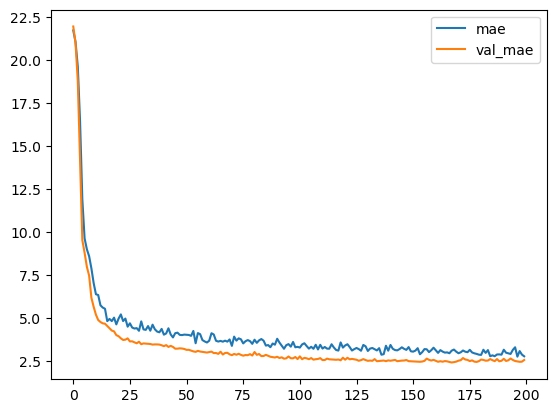

In [19]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [20]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  19.078275680541992
Mean Absolute Error :  2.739117383956909


In [21]:
Y_pred = model.predict(X_test)
Y_pred

5/5 [==============================] - 0s 3ms/step


array([[16.033947 ],
       [24.079403 ],
       [19.026302 ],
       [16.957829 ],
       [42.91414  ],
       [25.471289 ],
       [32.21843  ],
       [18.698418 ],
       [14.50753  ],
       [18.138725 ],
       [26.52912  ],
       [25.95243  ],
       [19.04536  ],
       [32.677902 ],
       [20.47561  ],
       [12.10625  ],
       [20.834614 ],
       [ 9.529525 ],
       [ 9.850017 ],
       [14.821028 ],
       [ 6.699036 ],
       [17.380724 ],
       [20.704666 ],
       [19.91325  ],
       [19.023537 ],
       [18.413567 ],
       [17.093653 ],
       [15.31507  ],
       [21.130844 ],
       [16.651688 ],
       [11.221208 ],
       [23.75276  ],
       [32.513287 ],
       [22.568449 ],
       [14.371677 ],
       [13.969945 ],
       [32.68005  ],
       [45.530796 ],
       [22.061752 ],
       [24.602936 ],
       [39.158276 ],
       [30.579166 ],
       [14.548006 ],
       [31.794012 ],
       [30.888603 ],
       [23.393648 ],
       [45.59633  ],
       [18.88

In [22]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.8172930422116924


5/5 [==============================] - 0s 4ms/step


[]

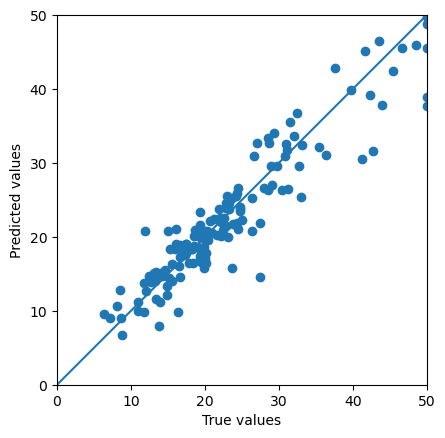

In [23]:
Y_pred = model.predict(X_test)

a = plt.axes(aspect='equal')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

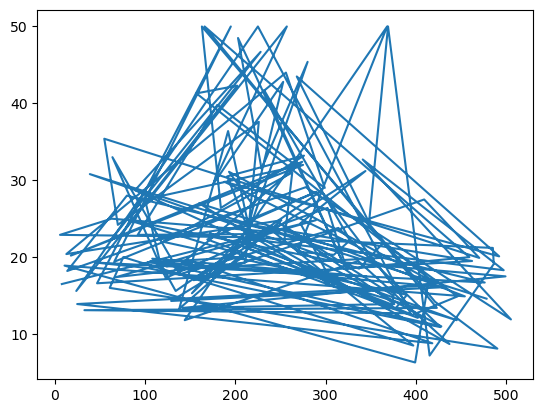

In [24]:
plt.plot(y_test)


array([[16.033947 ],
       [24.079403 ],
       [19.026302 ],
       [16.957829 ],
       [42.91414  ],
       [25.471289 ],
       [32.21843  ],
       [18.698418 ],
       [14.50753  ],
       [18.138725 ],
       [26.52912  ],
       [25.95243  ],
       [19.04536  ],
       [32.677902 ],
       [20.47561  ],
       [12.10625  ],
       [20.834614 ],
       [ 9.529525 ],
       [ 9.850017 ],
       [14.821028 ],
       [ 6.699036 ],
       [17.380724 ],
       [20.704666 ],
       [19.91325  ],
       [19.023537 ],
       [18.413567 ],
       [17.093653 ],
       [15.31507  ],
       [21.130844 ],
       [16.651688 ],
       [11.221208 ],
       [23.75276  ],
       [32.513287 ],
       [22.568449 ],
       [14.371677 ],
       [13.969945 ],
       [32.68005  ],
       [45.530796 ],
       [22.061752 ],
       [24.602936 ],
       [39.158276 ],
       [30.579166 ],
       [14.548006 ],
       [31.794012 ],
       [30.888603 ],
       [23.393648 ],
       [45.59633  ],
       [18.88

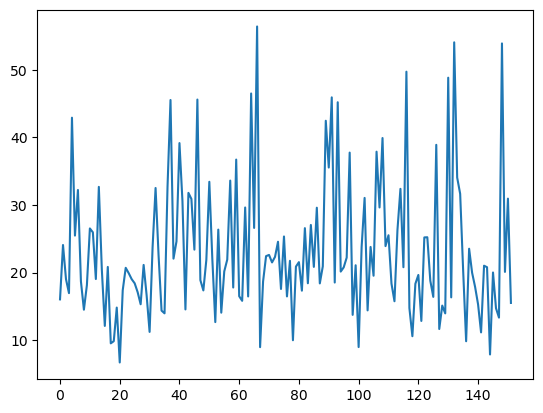

In [25]:
plt.plot(Y_pred)
Y_pred

In [26]:
print(Y_pred[:5])
print(y_test[:5])
y_test.head()

[[16.033947]
 [24.079403]
 [19.026302]
 [16.957829]
 [42.91414 ]]
8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: MEDV, dtype: float64


8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: MEDV, dtype: float64

Using ML MODEL lm for Linear Regression

In [27]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [28]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
# Value of y intercept
lm.intercept_

27.38093628000844

In [30]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-10.90502
1,ZN,5.56777
2,INDUS,-0.238526
3,CHAS,4.693448
4,NOX,-7.01579
5,RM,15.865749
6,AGE,-0.33478
7,DIS,-17.068774
8,RAD,7.503741
9,TAX,-7.370872


In [31]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [32]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.089861094971129
MSE: 19.07368870346903
RMSE: 4.367343437774162


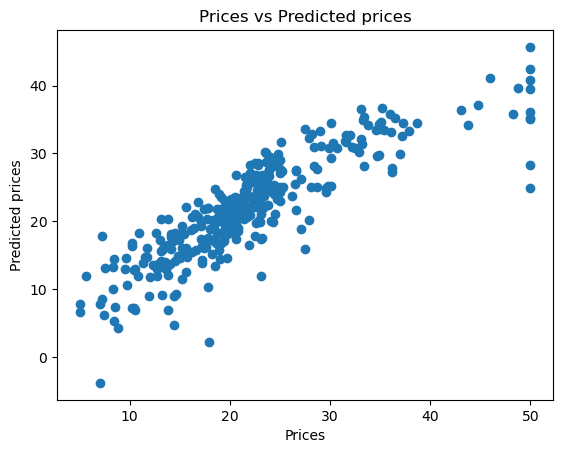

In [33]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

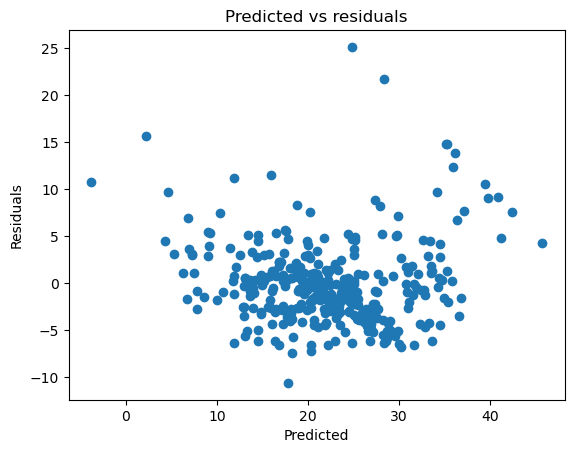

In [34]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\elle\AppData\Local\Temp\ipykernel_3388\3326403628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


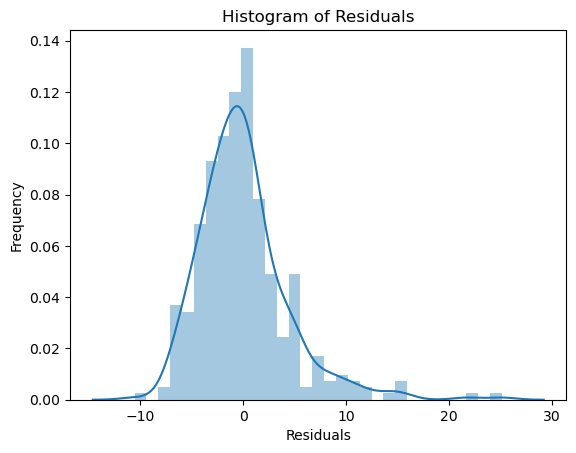

In [35]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [36]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [37]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409195
Adjusted R^2: 0.6850685326005713
MAE: 3.859005592370742
MSE: 30.053993307124127
RMSE: 5.482152251362974
